In [ ]:
# from google.colab import files
# uploaded = files.upload() 
# import pandas as pd



Saving dionaeaClean2.csv to dionaeaClean2 (1).csv


In [152]:
with open('dionaeaClean2.csv', 'r', encoding='utf-8') as file:
    for i in range(5): 
        print(file.readline())

protocol,transport,type,dst_port,src_ip,src_port,timestamp,,,,

smbd, tcp, accept,445, 62.74.213.178,1176, 2022-05-07T15:08:48.091297,,,,

smbd, tcp, accept,445, 62.74.213.178,1202, 2022-05-07T15:08:48.869184,,,,

smbd, tcp, accept,445, 62.74.213.178,1255, 2022-05-07T15:08:50.198560,,,,

smbd, tcp, accept,445, 62.74.213.178,1283, 2022-05-07T15:08:50.904213,,,,



In [153]:
import pandas as pd

df = pd.read_csv('dionaeaClean2.csv',  delimiter=',', on_bad_lines='skip',index_col='timestamp')
df = df.drop(['Unnamed: 7','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)

df.columns = df.columns.str.strip()

print("First 10 Rows: \n", df.head(10))

First 10 Rows: 
                            protocol transport     type  dst_port  \
timestamp                                                          
2022-05-07T15:08:48.091297     smbd       tcp   accept       445   
2022-05-07T15:08:48.869184     smbd       tcp   accept       445   
2022-05-07T15:08:50.198560     smbd       tcp   accept       445   
2022-05-07T15:08:50.904213     smbd       tcp   accept       445   
2022-05-07T15:08:51.603572     smbd       tcp   accept       445   
2022-05-07T15:08:52.309051     smbd       tcp   accept       445   
2022-05-07T15:08:53.698220     smbd       tcp   accept       445   
2022-05-07T15:08:54.440758     smbd       tcp   accept       445   
2022-05-07T15:08:55.224204     smbd       tcp   accept       445   
2022-05-07T15:08:55.937662     smbd       tcp   accept       445   

                                    src_ip  src_port  
timestamp                                             
2022-05-07T15:08:48.091297   62.74.213.178      1176  
2

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [155]:
print('Column Lists: ',df.columns.tolist())
print("Columns Datatypes: ",df.dtypes)

Column Lists:  ['protocol', 'transport', 'type', 'dst_port', 'src_ip', 'src_port']
Columns Datatypes:  protocol     object
transport    object
type         object
dst_port      int64
src_ip       object
src_port      int64
dtype: object


In [156]:
df['src_port'] = pd.to_numeric(df['src_port'], errors='coerce')
df['dst_port'] = pd.to_numeric(df['dst_port'], errors='coerce')
df['src_port'] = df['src_port'].fillna(0)
df['dst_port'] = df['dst_port'].fillna(0)


df['src_port'] = df['src_port'].astype('Int64')  
df['dst_port'] = df['dst_port'].astype('Int64')
df = df.reset_index()

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.set_index('timestamp', inplace=True)

print(df.dtypes)
print(df.head(10))

protocol     object
transport    object
type         object
dst_port      Int64
src_ip       object
src_port      Int64
dtype: object
                           protocol transport     type  dst_port  \
timestamp                                                          
2022-05-07 15:08:48.091297     smbd       tcp   accept       445   
2022-05-07 15:08:48.869184     smbd       tcp   accept       445   
2022-05-07 15:08:50.198560     smbd       tcp   accept       445   
2022-05-07 15:08:50.904213     smbd       tcp   accept       445   
2022-05-07 15:08:51.603572     smbd       tcp   accept       445   
2022-05-07 15:08:52.309051     smbd       tcp   accept       445   
2022-05-07 15:08:53.698220     smbd       tcp   accept       445   
2022-05-07 15:08:54.440758     smbd       tcp   accept       445   
2022-05-07 15:08:55.224204     smbd       tcp   accept       445   
2022-05-07 15:08:55.937662     smbd       tcp   accept       445   

                                    src_ip  src_p

In [157]:
df = df.dropna()

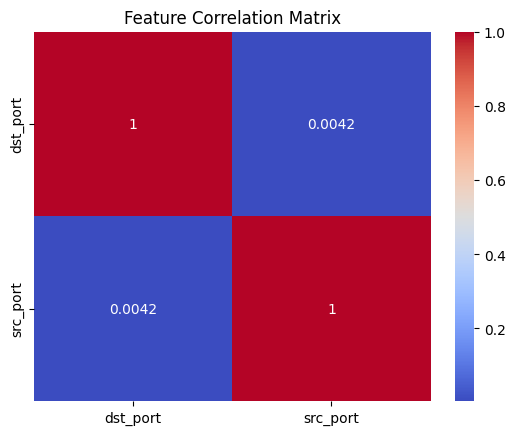

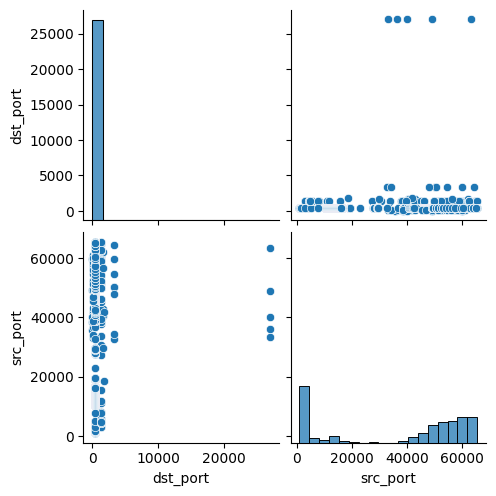

In [158]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

sns.pairplot(df, vars=numeric_df.columns)
plt.show()

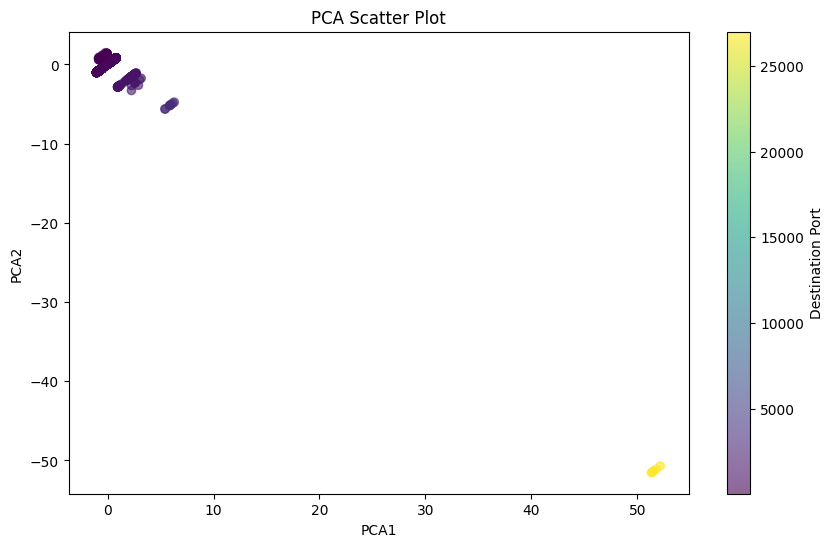

In [159]:
df = pd.get_dummies(df, drop_first=True)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_results[:, 0], pca_results[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['dst_port'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Destination Port')
plt.title("PCA Scatter Plot")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [160]:
X = df.drop(['dst_port'], axis=1)  
y = df['dst_port'] 


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [161]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [162]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.999758249728031
              precision    recall  f1-score   support

        21.0       1.00      1.00      1.00         3
        81.0       1.00      1.00      1.00        16
       445.0       1.00      1.00      1.00      8233
      1433.0       0.93      1.00      0.96        13
      1723.0       0.50      1.00      0.67         1
      1883.0       0.00      0.00      0.00         2
      3306.0       1.00      1.00      1.00         2
     27017.0       1.00      1.00      1.00         3

    accuracy                           1.00      8273
   macro avg       0.80      0.88      0.83      8273
weighted avg       1.00      1.00      1.00      8273



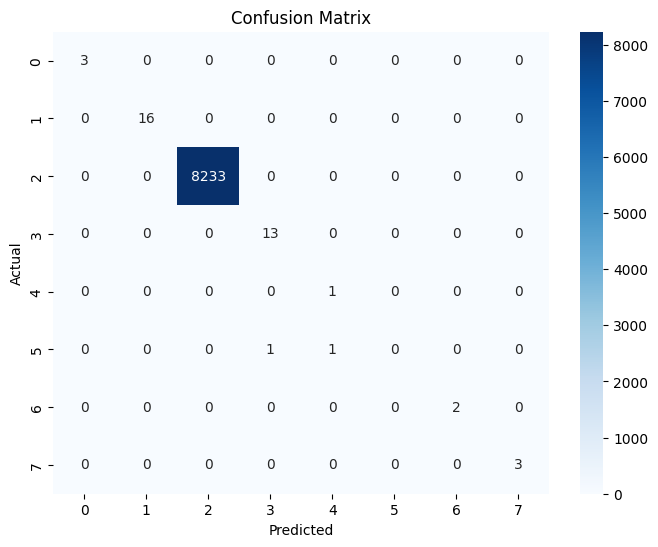

In [163]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

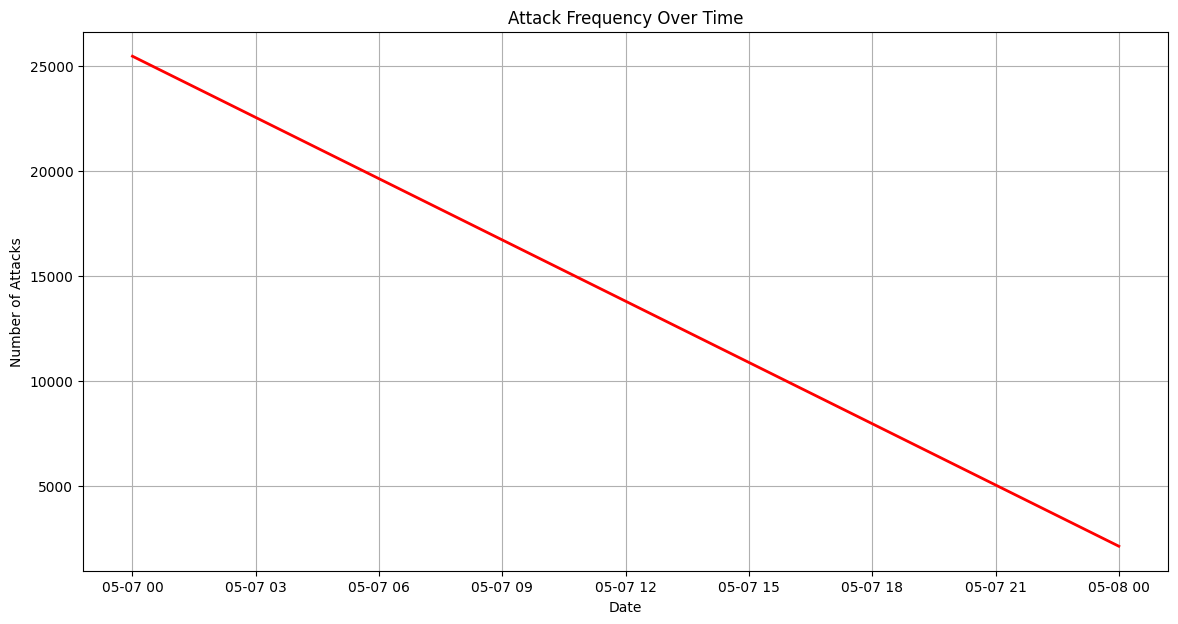

In [164]:
attack_counts = df.resample('D').size()


plt.figure(figsize=(14, 7))
plt.plot(attack_counts, color='red', linewidth=2)
plt.title("Attack Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.show()


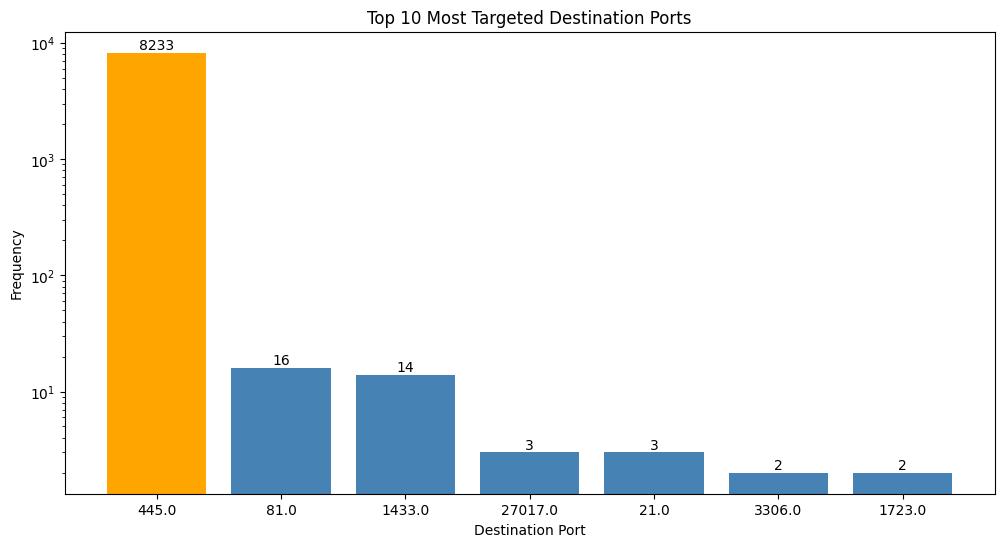

In [165]:
y_pred = model.predict(X_test)


test_results = X_test.copy()
test_results['predicted_port'] = y_pred


test_results['index'] = test_results.index


df_with_predictions = df.merge(test_results[['index', 'predicted_port']], left_index=True, right_on='index', how='left')


plt.figure(figsize=(12, 6))  
port_counts = df_with_predictions['predicted_port'].value_counts().head(10)
bars = plt.bar(port_counts.index.astype(str), port_counts.values, color=['steelblue' if x < 500 else 'orange' for x in port_counts.values])

plt.title('Top 10 Most Targeted Destination Ports')
plt.xlabel('Destination Port')
plt.ylabel('Frequency')


plt.yscale('log')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()



In [180]:
df = pd.read_csv('dionaeaClean2.csv',  delimiter=',', on_bad_lines='skip',index_col='timestamp')
df = df.drop(['Unnamed: 7','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
df['src_port'] = pd.to_numeric(df['src_port'], errors='coerce')
df['dst_port'] = pd.to_numeric(df['dst_port'], errors='coerce')
df['src_port'] = df['src_port'].fillna(0)
df['dst_port'] = df['dst_port'].fillna(0)


df['src_port'] = df['src_port'].astype('Int64')  
df['dst_port'] = df['dst_port'].astype('Int64')
df = df.reset_index()

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.set_index('timestamp', inplace=True)

In [181]:
df.dropna()

,protocol,transport,type,dst_port,src_ip,src_port
timestamp,,,,,,
2022-05-07 15:08:48.091297,smbd,tcp,accept,445,62.74.213.178,1176
2022-05-07 15:08:48.869184,smbd,tcp,accept,445,62.74.213.178,1202
2022-05-07 15:08:50.198560,smbd,tcp,accept,445,62.74.213.178,1255
2022-05-07 15:08:50.904213,smbd,tcp,accept,445,62.74.213.178,1283
2022-05-07 15:08:51.603572,smbd,tcp,accept,445,62.74.213.178,1313
...,...,...,...,...,...,...
2022-05-08 04:20:19.737877,smbd,tcp,accept,445,103.61.254.64,57379
2022-05-08 04:22:18.623864,smbd,tcp,accept,445,103.61.254.64,59854
2022-05-08 04:22:27.055905,smbd,tcp,accept,445,103.61.254.64,60026


In [184]:
df['request_count'] = df.groupby('src_ip')['src_ip'].transform('count')

df['is_failed'] = df['type'].apply(lambda x: 1 if x != 'accept' else 0)


threshold = 100  
df['label'] = (df['request_count'] > threshold).astype(int)

In [185]:

features = ['request_count', 'is_failed']
X = df[features]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [186]:

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [187]:
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00      5481

    accuracy                           1.00      5515
   macro avg       1.00      1.00      1.00      5515
weighted avg       1.00      1.00      1.00      5515



In [188]:
y_pred = model.predict(X_test)

test_results = X_test.copy()
test_results['predicted_attack'] = y_pred

df_with_predictions = df.merge(test_results[['predicted_attack']], left_index=True, right_index=True, how='left')

dos_df = df_with_predictions[df_with_predictions['predicted_attack'] == 1]

dos_ips_df = dos_df[['src_ip','request_count']].drop_duplicates()

print(dos_ips_df)

                                      src_ip  request_count
timestamp                                                  
2022-05-07 15:08:50.904213     62.74.213.178           8383
2022-05-07 16:00:50.423670      5.190.78.249            652
2022-05-07 17:19:21.313316    201.65.241.162           3150
2022-05-07 18:07:50.908284     197.51.208.32           3147
2022-05-07 18:57:13.663014    154.115.33.211           3145
2022-05-07 20:23:38.754645       2.60.118.78            549
2022-05-07 21:25:19.515671      80.75.161.98           3145
2022-05-07 22:16:24.018929   186.176.210.229           3148
2022-05-08 02:34:28.938533     103.61.254.64           2065
